In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('./ltfc/car data.csv')

In [24]:
df= dataset.copy()

In [4]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [5]:
df.shape

(301, 9)

In [25]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']


In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [26]:
df.drop('Car_Name',axis=1, inplace= True)

In [27]:
df['Current_yr'] =2020

In [28]:
df['num_of_yrs']=df['Current_yr']-df['Year']

In [29]:
df.drop(['Year','Current_yr'], axis=1, inplace =True)

In [32]:
dfnew = pd.get_dummies(df, drop_first = True)

In [33]:
dfnew

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_yrs,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,4,1,0,0,1
297,4.00,5.90,60000,0,5,0,1,0,1
298,3.35,11.00,87934,0,11,0,1,0,1
299,11.50,12.50,9000,0,3,1,0,0,1


In [35]:
import seaborn as sns

In [36]:
dfnew.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,num_of_yrs,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
num_of_yrs,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


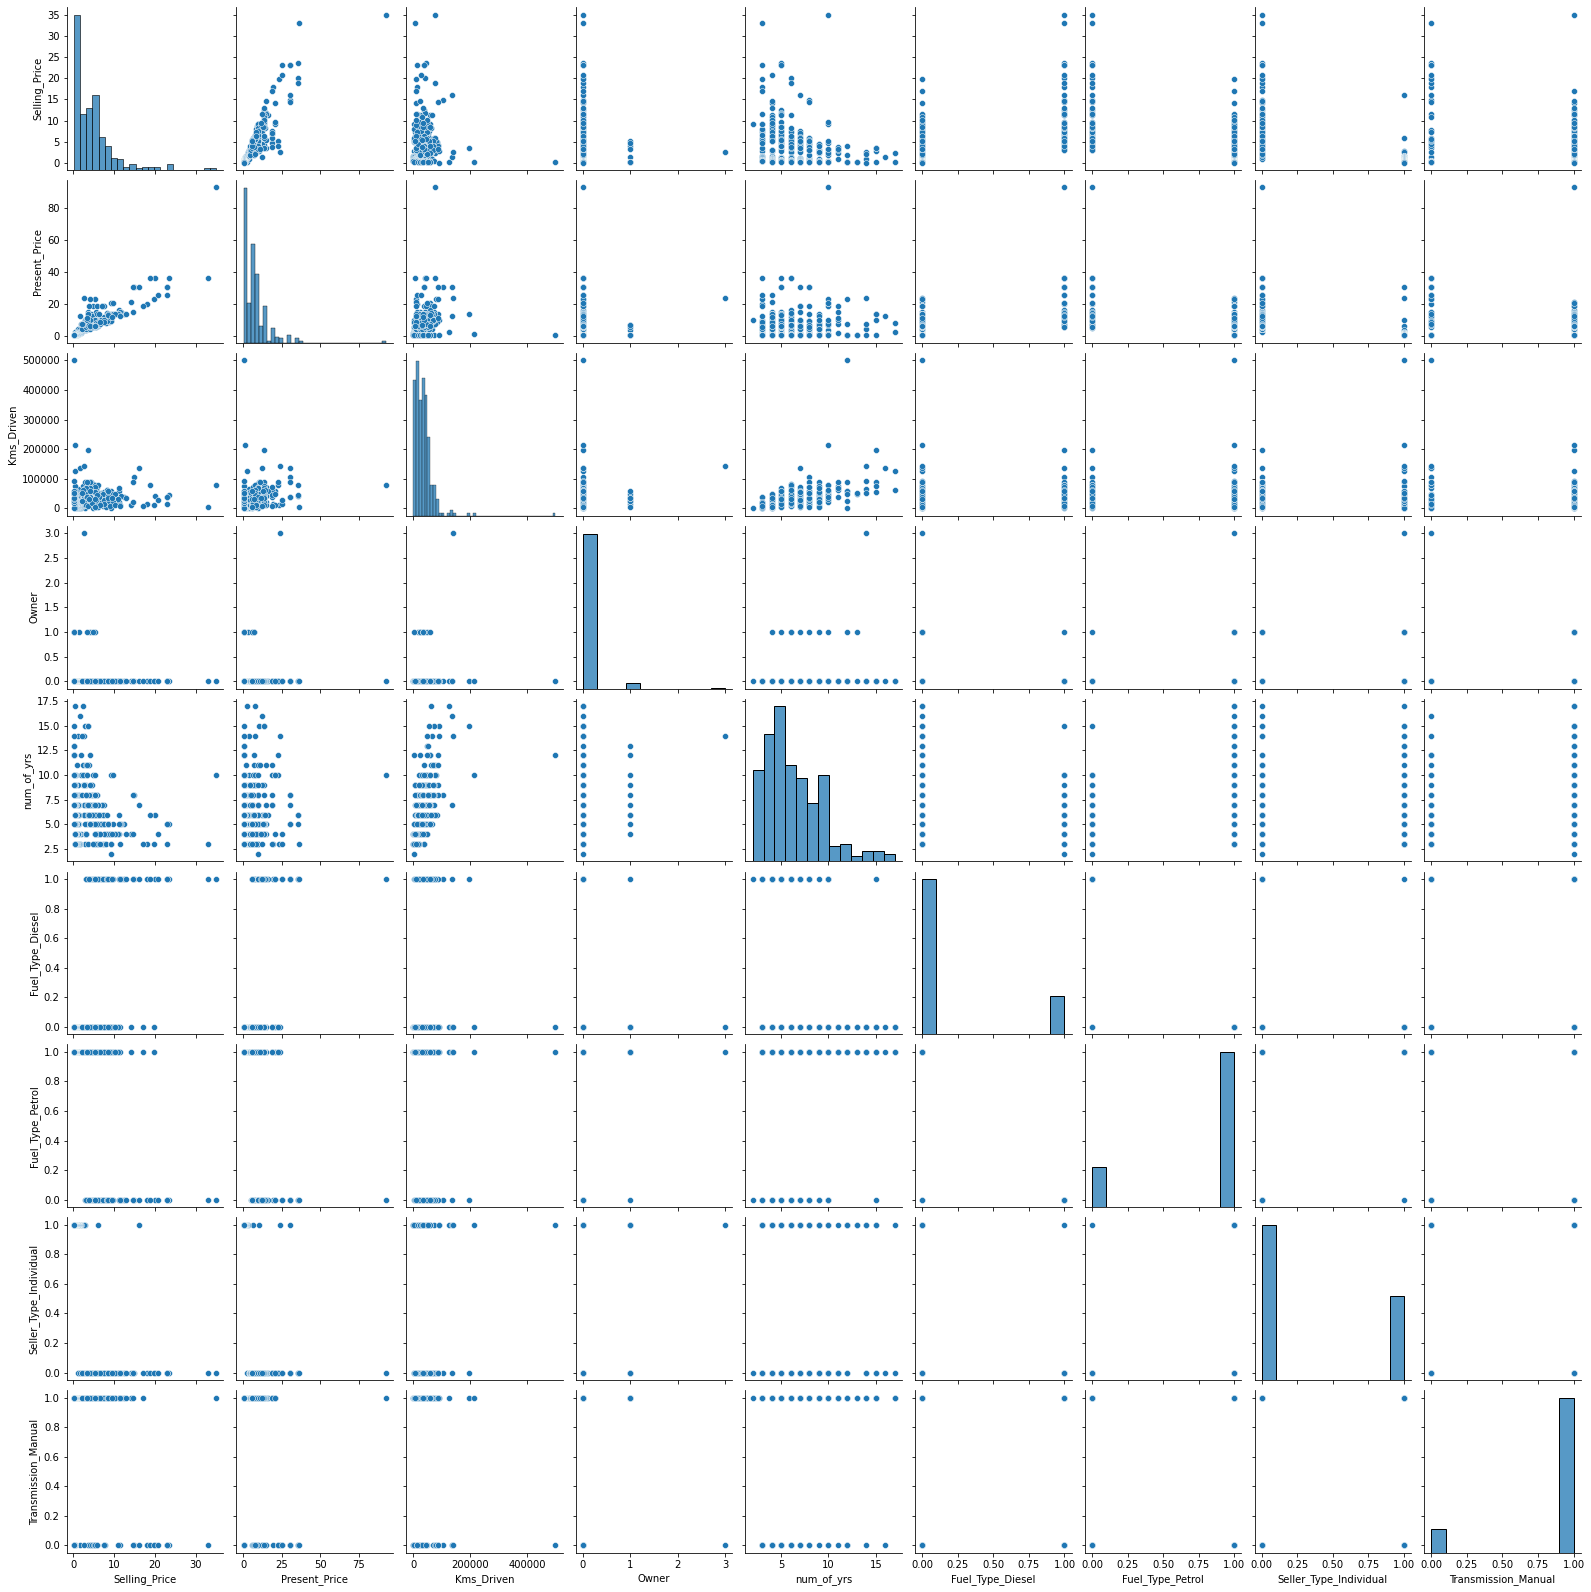

In [37]:
sns.pairplot(dfnew)

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

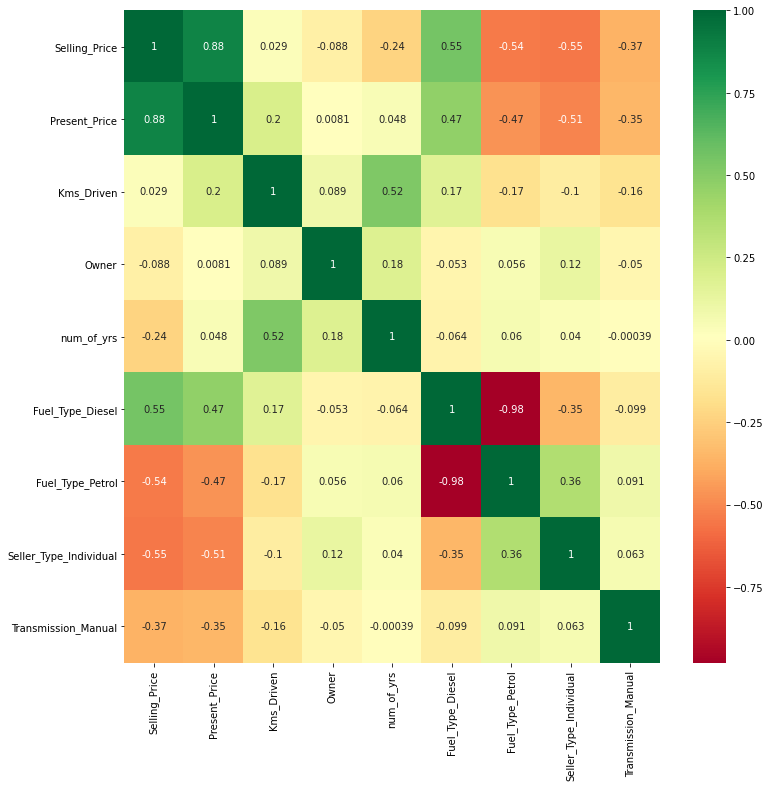

In [41]:
corr_mat = dfnew.corr()
top_corr_features = corr_mat.index
plt.figure(figsize =(12,12))
#plot heat map
g= sns.heatmap(dfnew[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [42]:
y = dfnew.pop('Selling_Price')
X= dfnew.copy()

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
model= ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [46]:
print(model.feature_importances_)

[4.07403482e-01 3.80102697e-02 3.37264536e-04 7.76819331e-02
 2.07640283e-01 1.17930175e-02 1.26525262e-01 1.30608489e-01]


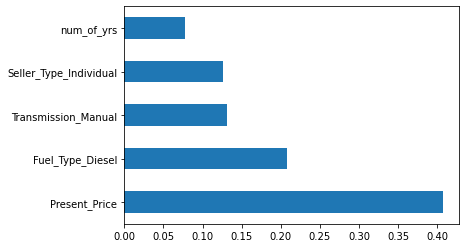

In [49]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.15, random_state=2)

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [68]:
#hyperperameter
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200, num =12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [75]:
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(start=5,stop=30, num =6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [77]:
RF =  RandomForestRegressor()

In [78]:
rand_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
print(rand_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [79]:
rf_random = RandomizedSearchCV( estimator=RF,
    param_distributions=rand_grid,
    n_iter=10,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1,
    refit=True,
    pre_dispatch='2*n_jobs',
    return_train_score=False,)

In [80]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   5.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [81]:
pred = rf_random.predict(X_test)

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

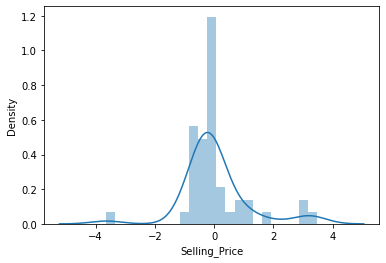

In [83]:
sns.distplot(y_test-pred)

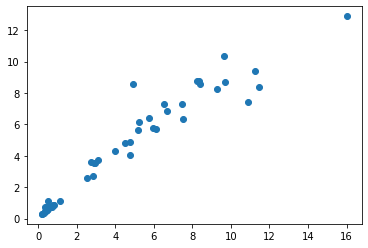

In [84]:
plt.scatter(y_test, pred)

* plot is in linear manner, in conclusion we can say that it is a well trained model

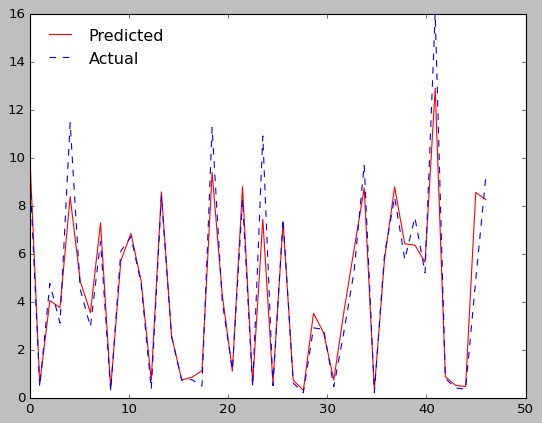

In [88]:
x=0
x_Axis = np.linspace(x, x +46 , num=46)
plt.style.use('classic')
fig, ax = plt.subplots()
ax.plot(x_Axis, pred[0:46], '-r', label='Predicted')
ax.plot(x_Axis, y_test[0:46], '--b', label='Actual')
#ax.axis('equal')
ax.legend(loc='upper left', frameon=False)
#leg = ax.legend();
fig
plt.show()

In [90]:
import pickle 
file = open('random_forest_regression_model.pkl','wb')
pickle.dump(rf_random, file)